In [1]:
import os
import random
import numpy as np
import pandas as pd

from PIL import Image
from IPython.display import display
from transformers import ViTImageProcessor, ViTModel

In [2]:
train = pd.read_csv("../data/train.csv")

In [3]:
def get_random_pair(dataframe: pd.DataFrame):
    row_index = random.randint(0, len(dataframe))
    path1 = dataframe.iloc[row_index, dataframe.columns.get_loc("image_url1")]
    path2 = dataframe.iloc[row_index, dataframe.columns.get_loc("image_url2")]
    label = dataframe.iloc[row_index, dataframe.columns.get_loc("is_same")]

    path1 = os.path.join("..", "data", "train", path1.split("/")[-1])
    path2 = os.path.join("..", "data", "train", path2.split("/")[-1])

    image1 = Image.open(path1)
    image2 = Image.open(path2)

    return image1, image2, label

In [6]:
image1, image2, label = get_random_pair(train)

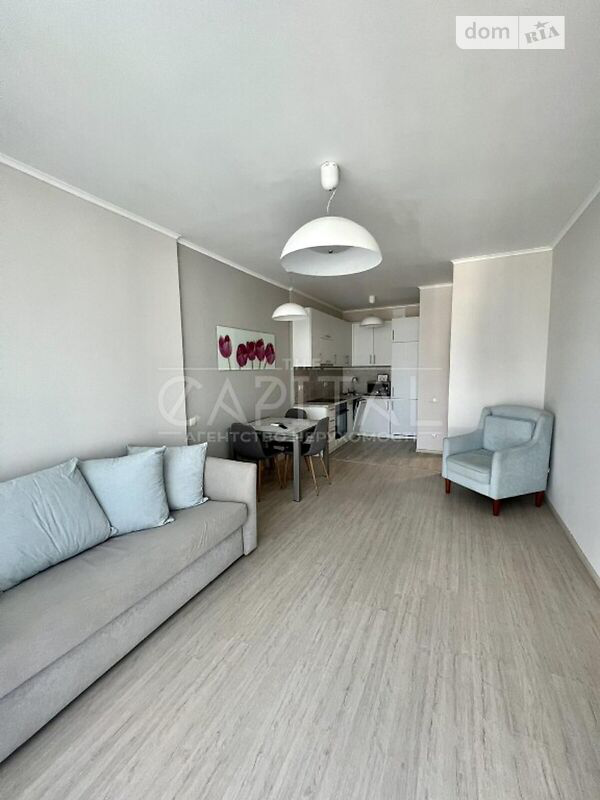

In [7]:
display(image1)

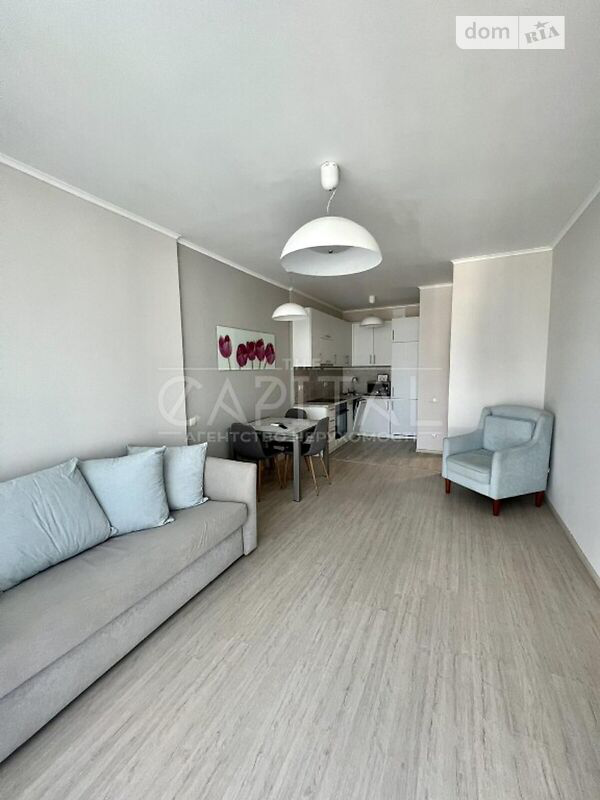

In [8]:
display(image2)

In [9]:
print(label)

1


In [10]:
processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

In [11]:
inputs1 = processor(images=image1, return_tensors="pt")
outputs1 = model(**inputs1)
tensor1 = outputs1.last_hidden_state.detach().numpy()
print(tensor1)

[[[-0.02774969 -0.16694507 -0.27910608 ...  0.03449851 -0.32845733
   -0.1145789 ]
  [-0.18918535  0.11937988 -0.16987899 ... -0.01885683 -0.33007357
   -0.3173777 ]
  [-0.20739415  0.10207273 -0.13953039 ... -0.05913055 -0.44488215
   -0.31513822]
  ...
  [-0.07736741 -0.05224963 -0.43125668 ...  0.06174597 -0.39396268
   -0.2610995 ]
  [-0.02119922 -0.12934472 -0.45044854 ...  0.03527146 -0.3054457
   -0.17927599]
  [-0.00681545 -0.00783481 -0.324789   ...  0.10421814 -0.17047352
   -0.12818608]]]


In [12]:
inputs2 = processor(images=image2, return_tensors="pt")
outputs2 = model(**inputs2)
tensor2 = outputs2.last_hidden_state.detach().numpy()
print(tensor2)

[[[-0.02774969 -0.16694507 -0.27910608 ...  0.03449851 -0.32845733
   -0.1145789 ]
  [-0.18918535  0.11937988 -0.16987899 ... -0.01885683 -0.33007357
   -0.3173777 ]
  [-0.20739415  0.10207273 -0.13953039 ... -0.05913055 -0.44488215
   -0.31513822]
  ...
  [-0.07736741 -0.05224963 -0.43125668 ...  0.06174597 -0.39396268
   -0.2610995 ]
  [-0.02119922 -0.12934472 -0.45044854 ...  0.03527146 -0.3054457
   -0.17927599]
  [-0.00681545 -0.00783481 -0.324789   ...  0.10421814 -0.17047352
   -0.12818608]]]


In [13]:
euclidean_similarity = np.linalg.norm(tensor1 - tensor2)
cosine_similarity = np.dot(tensor1.flatten(), tensor2.flatten()) / (np.linalg.norm(tensor1) * np.linalg.norm(tensor2))
dot_similarity = np.sum(tensor1 * tensor2)

In [14]:
print(euclidean_similarity)
print(cosine_similarity)
print(dot_similarity)

0.0
1.0
5328.9717
